# `Step 4: Outlier`
- Free
- Z Score
- ISO
- ISO 

# 0- `Config`

In [1]:
import pandas as pd 
import numpy as np 
import pickle 

In [2]:
try: 
    if manager == 1:
        print("s1_load.ipynb running from MANAGER")
except: 
    %run s0_config.ipynb 
    subject_outlier_0 = "ISO_v0"  
    subject_outlier_1 = "Empty_v0" 

s0_config.ipynb | Started
s0_config.ipynb | Finished


# 1- `Load`

In [3]:
import_name = "data_raw"
with open(os.path.join(access_data_path(f"{process_barcode}/data/{folder_load}", f"{import_name}" + ".pkl")) , 'rb') as file:
    data_raw = pickle.load(file) 

import_name = "data_full"
with open(os.path.join(access_data_path(f"{process_barcode}/data/{folder_load}", f"{import_name}" + ".pkl")) , 'rb') as file:
    data_full = pickle.load(file) 

---
# 2- `Preprocessing`

### 0-) `Overview`

In [4]:
print(f"Subject Outlier of Embeddings: {subject_outlier_0}")
print(f"Subject Outlier of Expression: {subject_outlier_1}") 
print(f"Shape: {data_full.shape}") 
print(f"Number of unique cell types: {len(pd.unique(data_full['Cell_Type']))}")  
print(f"Unique cell types: {pd.unique(data_full['Cell_Type'])}")  
pd.concat([data_full.head(2), data_full.tail(2)], axis=0) 

Subject Outlier of Embeddings: ISO_v0
Subject Outlier of Expression: Empty_v0
Shape: (2652, 3)
Number of unique cell types: 17
Unique cell types: ['hematopoietic stem cell' 'megakaryocyte-erythroid progenitor cell'
 'blood cell' 'mast cell' 'B cell' 'dendritic cell' 'natural killer cell'
 'CD4-positive, alpha-beta T cell' 'CD8-positive, alpha-beta T cell'
 'gamma-delta T cell' 'double-positive, alpha-beta thymocyte'
 'classical monocyte' 'non-classical monocyte' 'mucosal invariant T cell'
 'plasmablast' 'enucleated reticulocyte'
 'double negative T regulatory cell']


,Cell_Type,Gene_Marker,Embeddings
0,hematopoietic stem cell,PRSS57,"[-0.9413121938705444, -0.27585095167160034, -0..."
1,hematopoietic stem cell,ENSG00000175061,"[-0.8852061629295349, -0.14961037039756775, -0..."
54,double negative T regulatory cell,"CD3D,CST7,GZMA,CTSW,NKG7","[-0.8701768517494202, -0.2781621813774109, -0...."
55,double negative T regulatory cell,"CD3E,CST7,GZMA,CTSW,NKG7","[-0.8471667170524597, -0.23981180787086487, -0..."


### 1-) `Tool Setup`

In [5]:
outlier_tool = access_data_path(f"{process_barcode}/class/{folder_outlier}", "tool" + ".ipynb") 
%run $outlier_tool 

### 2-) `Convert`

In [6]:
# We need to convert the data to numpy arrays
Embeddings       = np.stack(data_full['Embeddings'].values) 
# However, as there will be subject_data_full after the first process, this expression sample is just for demonstration. Besides it needs to be reshaped in future. 
#Expression_Matrix                             = data_full['Expression'].values 
# BERT does not have second matrix 
#label_embeddings_matrix        = np.stack(data_full['Cell_Type_Embeddings'].values)   

In [7]:
data_full

,Cell_Type,Gene_Marker,Embeddings
0,hematopoietic stem cell,PRSS57,"[-0.9413121938705444, -0.27585095167160034, -0..."
1,hematopoietic stem cell,ENSG00000175061,"[-0.8852061629295349, -0.14961037039756775, -0..."
2,hematopoietic stem cell,SPINK2,"[-0.8997896313667297, -0.2595725655555725, -0...."
3,hematopoietic stem cell,SOX4,"[-0.9085370302200317, -0.2897244691848755, -0...."
4,hematopoietic stem cell,SMIM24,"[-0.9258873462677002, -0.4131088852882385, -0...."
...,...,...,...
51,double negative T regulatory cell,"CD3D,CD3E,CST7,GZMA,NKG7","[-0.8572803735733032, -0.2793397903442383, -0...."
52,double negative T regulatory cell,"CD3D,CD3E,CST7,CTSW,NKG7","[-0.8608097434043884, -0.26231321692466736, -0..."
53,double negative T regulatory cell,"CD3D,CD3E,GZMA,CTSW,NKG7","[-0.8509758710861206, -0.24910897016525269, -0..."
54,double negative T regulatory cell,"CD3D,CST7,GZMA,CTSW,NKG7","[-0.8701768517494202, -0.2781621813774109, -0...."


In [8]:
data_full["Cell_Type"].value_counts() 

Cell_Type
hematopoietic stem cell                    156
gamma-delta T cell                         156
enucleated reticulocyte                    156
plasmablast                                156
mucosal invariant T cell                   156
non-classical monocyte                     156
classical monocyte                         156
double-positive, alpha-beta thymocyte      156
CD8-positive, alpha-beta T cell            156
megakaryocyte-erythroid progenitor cell    156
CD4-positive, alpha-beta T cell            156
natural killer cell                        156
dendritic cell                             156
B cell                                     156
mast cell                                  156
blood cell                                 156
double negative T regulatory cell          156
Name: count, dtype: int64

---
# 3- `Bench`

### 1-) `Embeddings`

#### 0-) `Oveview`

In [9]:
data_full

,Cell_Type,Gene_Marker,Embeddings
0,hematopoietic stem cell,PRSS57,"[-0.9413121938705444, -0.27585095167160034, -0..."
1,hematopoietic stem cell,ENSG00000175061,"[-0.8852061629295349, -0.14961037039756775, -0..."
2,hematopoietic stem cell,SPINK2,"[-0.8997896313667297, -0.2595725655555725, -0...."
3,hematopoietic stem cell,SOX4,"[-0.9085370302200317, -0.2897244691848755, -0...."
4,hematopoietic stem cell,SMIM24,"[-0.9258873462677002, -0.4131088852882385, -0...."
...,...,...,...
51,double negative T regulatory cell,"CD3D,CD3E,CST7,GZMA,NKG7","[-0.8572803735733032, -0.2793397903442383, -0...."
52,double negative T regulatory cell,"CD3D,CD3E,CST7,CTSW,NKG7","[-0.8608097434043884, -0.26231321692466736, -0..."
53,double negative T regulatory cell,"CD3D,CD3E,GZMA,CTSW,NKG7","[-0.8509758710861206, -0.24910897016525269, -0..."
54,double negative T regulatory cell,"CD3D,CST7,GZMA,CTSW,NKG7","[-0.8701768517494202, -0.2781621813774109, -0...."


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


#### 1-) `Operation`

In [11]:
# Extract embeddings
Embeddings = np.array(data_full['Embeddings'].tolist())

# Set the outlier detection method
subject_outlier = subject_outlier_0

# Temporarily set target_embeddings_matrix
target_embeddings_matrix = Embeddings.copy()

# Prepare input data
data_embedded = data_full.copy()

# Run the outlier detection script
# Ensure that `operation.ipynb` runs without issues and updates `subject_data_full`
outlier_operation = access_data_path(f"{process_barcode}/class/{folder_outlier}", "operation" + ".ipynb") 
%run $outlier_operation 

# Update data_full with the cleaned data
data_full = data_embedded.copy()
cleaned_data_full = subject_data_full.copy()  # This should now have outliers removed

Calculation of ISO_v0 Started
Calculation of ISO_v0 Finished


#### 3-) `Report`

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function for PCA and visualization
def visualize_embeddings(original_embeddings, cleaned_embeddings, title_suffix, switch_plot = 0):
    # Flatten the embeddings for easier visualization if necessary
    original_embeddings_flat = original_embeddings.reshape(-1, original_embeddings.shape[-1])
    cleaned_embeddings_flat = cleaned_embeddings.reshape(-1, cleaned_embeddings.shape[-1])
    
    # Apply PCA to reduce to 2D
    pca = PCA(n_components=2)
    original_embeddings_2d = pca.fit_transform(original_embeddings_flat)
    cleaned_embeddings_2d = pca.transform(cleaned_embeddings_flat)
    
    if switch_plot == 0: 
        # Plot original embeddings
        plt.figure(figsize=(12, 6))
        plt.scatter(original_embeddings_2d[:, 0], original_embeddings_2d[:, 1], alpha=0.5, label='Before Outlier Removal')
        plt.title(f'PCA of Embeddings Before Outlier Removal {title_suffix}')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.legend()
        plt.show()
    elif switch_plot == 1:
        # Plot cleaned embeddings
        plt.figure(figsize=(12, 6))
        plt.scatter(cleaned_embeddings_2d[:, 0], cleaned_embeddings_2d[:, 1], alpha=0.5, label='After Outlier Removal', color='red')
        plt.title(f'PCA of Embeddings After Outlier Removal {title_suffix}')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.legend()
        plt.show()
# Extract the embeddings from cleaned_data_full
cleaned_embeddings = np.array(cleaned_data_full['Embeddings'].tolist())


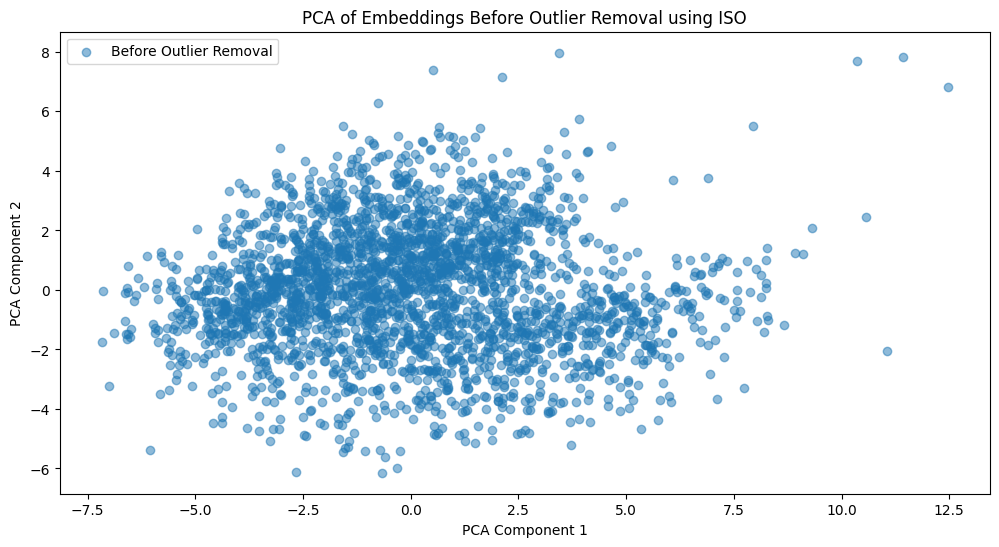

In [13]:
visualize_embeddings(Embeddings, cleaned_embeddings, 'using ISO', switch_plot = 0)  

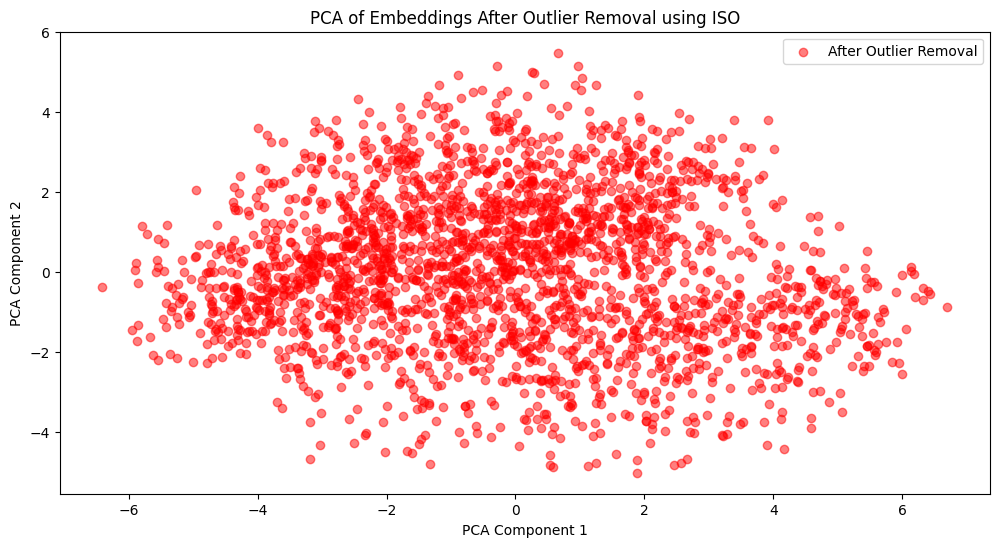

In [14]:
# Visualize
visualize_embeddings(Embeddings, cleaned_embeddings, 'using ISO', switch_plot = 1)  

In [15]:
print(f"Shape (Before): {data_full.shape}") 
print(f"Shape (After): {subject_data_full.shape}")  
print(f"Discarded rows: {data_full.shape[0] - subject_data_full.shape[0]}")  

print(f"Number of unique cell types: {len(pd.unique(data_full['Cell_Type']))}")  
print(f"Number of unique cell types: {len(pd.unique(subject_data_full['Cell_Type']))}")  
print(f"Lost cell types: {set(pd.unique(data_full['Cell_Type'])) - set(pd.unique(subject_data_full['Cell_Type']))}") 


Shape (Before): (2652, 3)
Shape (After): (2386, 3)
Discarded rows: 266
Number of unique cell types: 17
Number of unique cell types: 17
Lost cell types: set()


### 2-) `Cell_Type_Gene_Marker_Embeddings`

#### 0-) `Oveview`

In [16]:
data_full

,Cell_Type,Gene_Marker,Embeddings
0,hematopoietic stem cell,PRSS57,"[-0.9413121938705444, -0.27585095167160034, -0..."
1,hematopoietic stem cell,ENSG00000175061,"[-0.8852061629295349, -0.14961037039756775, -0..."
2,hematopoietic stem cell,SPINK2,"[-0.8997896313667297, -0.2595725655555725, -0...."
3,hematopoietic stem cell,SOX4,"[-0.9085370302200317, -0.2897244691848755, -0...."
4,hematopoietic stem cell,SMIM24,"[-0.9258873462677002, -0.4131088852882385, -0...."
...,...,...,...
51,double negative T regulatory cell,"CD3D,CD3E,CST7,GZMA,NKG7","[-0.8572803735733032, -0.2793397903442383, -0...."
52,double negative T regulatory cell,"CD3D,CD3E,CST7,CTSW,NKG7","[-0.8608097434043884, -0.26231321692466736, -0..."
53,double negative T regulatory cell,"CD3D,CD3E,GZMA,CTSW,NKG7","[-0.8509758710861206, -0.24910897016525269, -0..."
54,double negative T regulatory cell,"CD3D,CST7,GZMA,CTSW,NKG7","[-0.8701768517494202, -0.2781621813774109, -0...."


#### 1-) `Operation`

In [17]:
try:
    Expression_Matrix          = subject_data_full['Expression'].values 

    Expression_Matrix_Reshaped = Expression_Matrix.reshape(-1, 1) # Necessary for the pipeline  
except: 
    pass 

In [18]:
try: 
    # Temporarly for operation 
    target_embeddings_matrix = Expression_Matrix_Reshaped.copy() 
    subject_outlier          = subject_outlier_1

    # Input data: data_full
    data_embedded = subject_data_full.copy() 
    outlier_operation = access_data_path(f"{process_barcode}/class/{folder_outlier}", "operation" + ".ipynb") 
    %run $outlier_operation 
    data_full = data_embedded.copy() 
    # Output: subject_data_full 
except:
    pass 

#### 2-) `Report`

In [19]:
try: 
    print(f"Shape (Before): {data_embedded.shape}") 
    print(f"Shape (After): {subject_data_full.shape}")  
    print(f"Discarded rows: {data_embedded.shape[0] - subject_data_full.shape[0]}")  

    print(f"Number of unique cell types: {len(pd.unique(data_embedded['Cell_Type']))}")  
    print(f"Number of unique cell types: {len(pd.unique(subject_data_full['Cell_Type']))}")  
    print(f"Lost cell types: {set(pd.unique(data_embedded['Cell_Type'])) - set(pd.unique(subject_data_full['Cell_Type']))}") 
except:
    pass 

Shape (Before): (2652, 3)
Shape (After): (2386, 3)
Discarded rows: 266
Number of unique cell types: 17
Number of unique cell types: 17
Lost cell types: set()


In [20]:
subject_data_full

,Cell_Type,Gene_Marker,Embeddings
0,hematopoietic stem cell,PRSS57,"[-0.9413121938705444, -0.27585095167160034, -0..."
1,hematopoietic stem cell,ENSG00000175061,"[-0.8852061629295349, -0.14961037039756775, -0..."
2,hematopoietic stem cell,SPINK2,"[-0.8997896313667297, -0.2595725655555725, -0...."
3,hematopoietic stem cell,SOX4,"[-0.9085370302200317, -0.2897244691848755, -0...."
4,hematopoietic stem cell,SMIM24,"[-0.9258873462677002, -0.4131088852882385, -0...."
...,...,...,...
51,double negative T regulatory cell,"CD3D,CD3E,CST7,GZMA,NKG7","[-0.8572803735733032, -0.2793397903442383, -0...."
52,double negative T regulatory cell,"CD3D,CD3E,CST7,CTSW,NKG7","[-0.8608097434043884, -0.26231321692466736, -0..."
53,double negative T regulatory cell,"CD3D,CD3E,GZMA,CTSW,NKG7","[-0.8509758710861206, -0.24910897016525269, -0..."
54,double negative T regulatory cell,"CD3D,CST7,GZMA,CTSW,NKG7","[-0.8701768517494202, -0.2781621813774109, -0...."


In [21]:
subject_data_full["Cell_Type"].value_counts() 

Cell_Type
megakaryocyte-erythroid progenitor cell    152
double negative T regulatory cell          151
gamma-delta T cell                         149
enucleated reticulocyte                    148
plasmablast                                148
hematopoietic stem cell                    147
mast cell                                  147
natural killer cell                        144
double-positive, alpha-beta thymocyte      144
CD4-positive, alpha-beta T cell            143
dendritic cell                             142
non-classical monocyte                     142
CD8-positive, alpha-beta T cell            141
classical monocyte                         131
B cell                                     130
mucosal invariant T cell                   122
blood cell                                 105
Name: count, dtype: int64

---
# 4- `End`

In [22]:
print(f"Subject Outlier 0 (Embedding): {subject_outlier_0}")
print(f"Subject Outlier 1 (Expression): {subject_outlier_1}")

Subject Outlier 0 (Embedding): ISO_v0
Subject Outlier 1 (Expression): Empty_v0


In [23]:
export_name = "data_raw" 
with open(os.path.join(access_data_path(f"{process_barcode}/data/{folder_outlier}", f"{export_name}" + ".pkl"))  , 'wb') as file: 
    pickle.dump(data_raw, file)   

export_name = "subject_data_full" 
with open(os.path.join(access_data_path(f"{process_barcode}/data/{folder_outlier}", f"{export_name}" + ".pkl"))  , 'wb') as file: 
    pickle.dump(subject_data_full, file)   
    
export_name = "subject_outlier_0" 
with open(os.path.join(access_data_path(f"{process_barcode}/data/{folder_outlier}", f"{export_name}" + ".pkl"))  , 'wb') as file: 
    pickle.dump(subject_outlier_0, file)   

export_name = "subject_outlier_1" 
with open(os.path.join(access_data_path(f"{process_barcode}/data/{folder_outlier}", f"{export_name}" + ".pkl"))  , 'wb') as file: 
    pickle.dump(subject_outlier_1, file)   